In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import skimage
from tensorflow.keras import layers

import warnings
warnings.filterwarnings('ignore')

In [2]:
input_dir = "/Users/Camilo/Desktop/U/Semestre 11vo/Seminario/Jupyter/HER2_images_pixel_segmentation/imgs/"
target_dir = "/Users/Camilo/Desktop/U/Semestre 11vo/Seminario/Jupyter/HER2_images_pixel_segmentation/labels/"
img_size = (200, 200)
num_classes = 1
batch_size = 32

input_img_paths = sorted(
    [
        os.path.join(input_dir, fname)
        for fname in os.listdir(input_dir)
        if fname.endswith(".png")
    ]
)

print("Number of samples:", len(input_img_paths))

Number of samples: 225


In [3]:
flipped_lr = [tf.image.flip_left_right(skimage.io.imread(input_img_paths[i])) for i in range(len(input_img_paths))]
flipped_ud = [tf.image.flip_up_down(skimage.io.imread(input_img_paths[i])) for i in range(len(input_img_paths))]
rotation = [tf.image.rot90(skimage.io.imread(input_img_paths[i])) for i in range(len(input_img_paths))]
central_crop = [tf.image.central_crop(skimage.io.imread(input_img_paths[i]), 0.8) for i in range(len(input_img_paths))]
brightness = [tf.image.adjust_brightness(skimage.io.imread(input_img_paths[i]), delta=0.3) for i in range(len(input_img_paths))]
transpose = [tf.image.transpose(skimage.io.imread(input_img_paths[i])) for i in range(len(input_img_paths))]


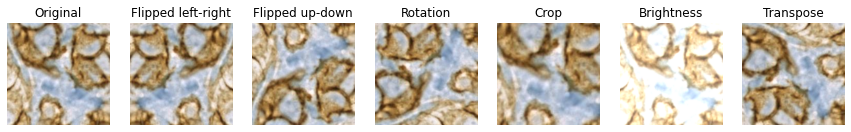

In [31]:
for i in range(1):
    fig, axes = plt.subplots(ncols=7, figsize=(15, 15))
    ax = axes.ravel()
    ax[0] = plt.subplot(1, 7, 1)
    ax[1] = plt.subplot(1, 7, 2)
    ax[2] = plt.subplot(1, 7, 3)
    ax[3] = plt.subplot(1, 7, 4)
    ax[4] = plt.subplot(1, 7, 5)
    ax[5] = plt.subplot(1, 7, 6)
    ax[6] = plt.subplot(1, 7, 7, sharex=ax[0], sharey=ax[0])
    
    ax[0].imshow(skimage.io.imread(input_img_paths[224]))
    ax[0].set_title('Original')
    ax[0].axis('off')

    ax[1].imshow(flipped_lr[224])
    ax[1].set_title('Flipped left-right')
    ax[1].axis('off')

    ax[2].imshow(flipped_ud[224])
    ax[2].set_title('Flipped up-down')
    ax[2].axis('off')

    ax[3].imshow(rotation[224])
    ax[3].set_title('Rotation')
    ax[3].axis('off')
    
    ax[4].imshow(central_crop[224])
    ax[4].set_title('Crop')
    ax[4].axis('off')
    
    ax[5].imshow(brightness[224])
    ax[5].set_title('Brightness')
    ax[5].axis('off')
    
    ax[6].imshow(transpose[224])
    ax[6].set_title('Transpose')
    ax[6].axis('off')

plt.savefig('augmentation.png', bbox_inches='tight')
plt.show()